## REGRESSION POLYNOMIALE  MULTIPLE AVEC NUMPY

In [2]:
# Chargement de numpy
import numpy as np
# dataset génération aléatoire avec sklearn.make_regression
from sklearn.datasets import make_regression
# pour les graphiques
import matplotlib.pyplot as plt

### 1. DATASET

In [3]:
# dataset génération aléatoire avec sklearn.make_regression
# avec vecteur Y, matrice X et vecteur teta
# modifie le nombre de features à 2
x, y = make_regression(n_samples=100, n_features=2, noise=10)

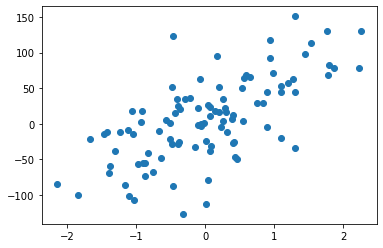

In [6]:
# visualiser y en fonction de x
plt.scatter(x[:,0], y)
plt.show()
# courbe non convexe, polynomiale de degré 2 au minimum

#### GESTION DU VECTEUR Y

In [7]:
# Vérification des dimensions de la matrice
print(x.shape) # 100 lignes, 1 colonne
print(y.shape) # 100 lignes, rien : dimension incomplète ==> la compléter reshape()

(100, 2)
(100,)


In [8]:
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


#### GESTION DE LA MATRICE X

In [11]:
# il nous faut une colonne X avec une colonne de biais : hstack
X = np.hstack((x, np.ones((x.shape[0],1))))
X.shape

(100, 3)

In [12]:
X[:10]

array([[ 1.09869787, -1.04402166,  1.        ],
       [ 1.52682395,  1.17976788,  1.        ],
       [-0.48067313,  1.65742856,  1.        ],
       [-0.0187289 , -0.0779075 ,  1.        ],
       [ 0.00672323, -0.25914708,  1.        ],
       [ 0.40691047, -1.12695035,  1.        ],
       [-0.05874541, -0.07821272,  1.        ],
       [ 0.04346496, -1.46912126,  1.        ],
       [-1.42026033,  1.29178358,  1.        ],
       [-1.1684981 , -0.93285438,  1.        ]])

### GESTION DU VECTEUR TETA

In [14]:
# teta non connu, on doit initilaiser téta avec des paramètres aléatoires en 3 dimension pour 3
# paramètres a, b et c
theta = np.random.randn(3, 1)
theta.shape

(3, 1)

In [15]:
theta # initialisé aléatoirement

array([[1.30854287],
       [2.69363719],
       [0.90695387]])

## 2. MODELE

In [16]:
# modèle linéaire ==> f(x) =X*theta
def model(X,theta):
    return X.dot(theta)

In [18]:
#  le modèle est disponible, on peut l'utiliser
model(X, theta)

array([[-0.46756844],
       [ 6.08273508],
       [ 4.74248367],
       [ 0.67259175],
       [ 0.21770328],
       [-1.59618171],
       [ 0.61940627],
       [-2.99345002],
       [ 2.52807864],
       [-3.13484724],
       [ 2.61033756],
       [-0.56548333],
       [ 2.88497885],
       [ 3.66430676],
       [ 1.71884114],
       [-0.58667014],
       [ 0.07036303],
       [-1.46926733],
       [ 2.13329826],
       [ 1.10155916],
       [ 0.20785073],
       [ 5.56715846],
       [-1.7269483 ],
       [ 0.29195331],
       [ 2.81854246],
       [ 2.32403117],
       [ 1.66512023],
       [ 0.65305208],
       [ 4.19268059],
       [ 0.52328918],
       [-0.14384762],
       [ 3.23350525],
       [ 6.03155877],
       [-2.91224677],
       [-1.80408034],
       [-4.73567634],
       [ 4.77081587],
       [ 7.29278481],
       [ 2.31917281],
       [ 0.09948011],
       [ 2.96781558],
       [ 2.79629767],
       [-0.74474301],
       [ 1.73435507],
       [ 5.21306288],
       [ 2

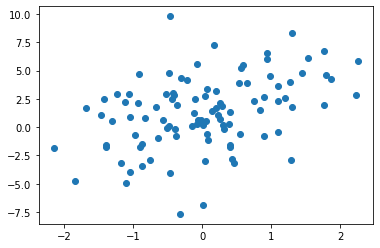

In [19]:
# afficher avec matplotlib les résultats de notre model par rapport au dataset
plt.scatter(x[:,0], model(X, theta))
plt.show()

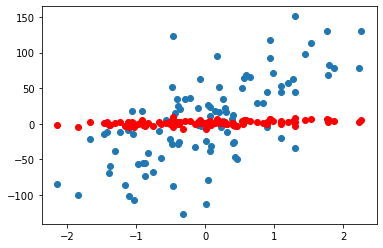

In [20]:
# en comparaison avec le dataset
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c='r')
plt.show() #pas très bon modèle

## 3. FONCTION COUT

In [23]:
#  erreur quadratique moyenne
def fonction_cout(X, y, theta):
    m=len(y)
    return 1/(2*m) * np.sum((model(X, theta)-y)**2)

In [24]:
fonction_cout(X, y, theta) #fort coût car on veut qu'il tende vers 0

1551.8330956407185

## DESCENTE DE GRADIENT

### GESTION DU GRADIENT

In [25]:
# fonction pour calculer le gradient
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

### GESTION DE LA DESCENTE DE GRADIENT

In [26]:
# fonction de la descente de gradient itérative
def gradient_descente(X, y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta) 
    return theta

## 4. ENTRAINEMENT DU MODELE

In [27]:
theta_final = gradient_descente(X, y, theta, learning_rate=0.001, n_iterations=10000)

In [28]:
theta_final

array([[40.73410777],
       [39.37039242],
       [-0.11242584]])

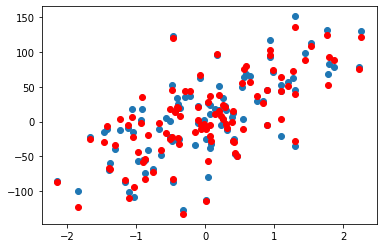

In [34]:
# est-ce que ce vecteur paramètre nous donne une bonne prédictions?
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')
plt.show()
# un peu mieux mais pas suffisant, l'apprentissage n'est pas terminé

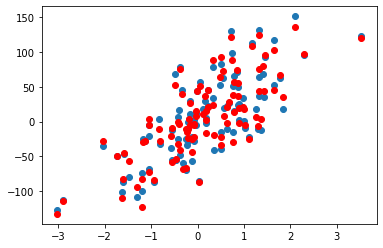

In [35]:
# est-ce que ce vecteur paramètre nous donne une bonne prédictions?
predictions = model(X, theta_final)
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], predictions, c='r')
plt.show()
# un peu mieux mais pas suffisant, l'apprentissage n'est pas terminé

In [36]:
# faire continuer l'apprentissage 
#  soit en refait des itérations
# soit on joue sur le learning rate .. .on fait de trop petit pas ==> 0.01.

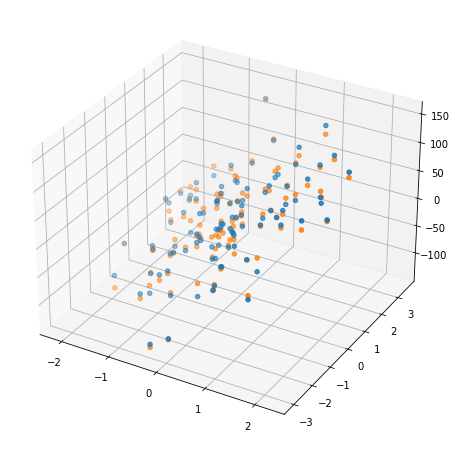

In [46]:
# graphique en 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)
plt.show()

In [38]:
theta_final_2 = gradient_descente(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [39]:
theta_final_2

array([[40.73431544],
       [39.3704209 ],
       [-0.11250086]])

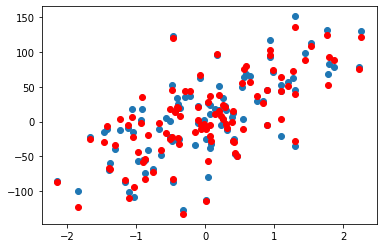

In [40]:
# est-ce que ce vecteur paramètre nous donne une bonne prédictions?
predictions = model(X, theta_final_2)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')
plt.show()
# oui bien meilleur résultat en réentrainant le modèle

## 5. COURBE D'APPRENTISSAGE

In [41]:
# comment tracer la minimisation de notre fonction coût avec le nombre d'itérations?
# comment voir si la machine réussi à bien apprendre?
# en modifiant la descente de gradient
def gradient_descente_bis(X, y, theta, learning_rate, n_iterations):
    # tableau rempli de zéro de dimension le nbre d'itérations
    cost_history= np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta) 
        # on sauvegarde le coût pour chaque itération
        cost_history[i] = fonction_cout(X, y, theta)
    return theta, cost_history

In [42]:
theta_final_2, cost_history = gradient_descente_bis(X, y, theta,
                                                    learning_rate=0.01, n_iterations=10000)

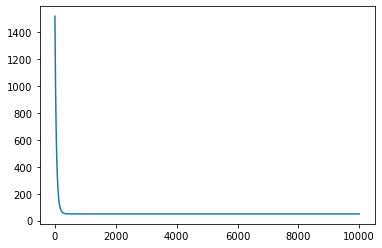

In [43]:
# tracer la progression de la fonction cout en fonction de l'itération
plt.plot(range(10000), cost_history)
plt.show()
# on peut voir que passer 400 itérations la machine ne progresse plus

## 6 COEFFICIENT DE DETERMINATION

In [44]:
# comment évaluer la performance de notre modèle en utilisant le coefficient de détermination
# coef de détermination = R au carré - méthode des moindes carrés
def coefficient_determination(y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [45]:
# calcul pour y et vecteur prédiction
coefficient_determination(y, predictions)
# 0.97 proche de 1 ==> OK maispeu faire mieux

0.9708609230660585